<a href="https://colab.research.google.com/github/AlGhifaryAN/MachineLearningTasksTK44G4/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [9]:
from google.colab import files

# Mengunggah file dari komputer ke Google Colab
uploaded = files.upload()

# Setelah file terunggah dapat membaca menggunakan Pandas
import pandas as pd
EconomiesOfScale = pd.read_csv('EconomiesOfScale.csv')
# Sekarang Anda dapat menggunakan data tersebut untuk analisis Anda
print(EconomiesOfScale.head())


Saving EconomiesOfScale.csv to EconomiesOfScale (4).csv
   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [11]:
EconomiesOfScale.head(17)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [15]:
# Mengambil data dari kolom yang sesuai
X = EconomiesOfScale['Number of Units'].values.reshape(-1, 1)  # Variabel independen (Number of Units)
y = EconomiesOfScale['Manufacturing Cost'].values  # Variabel dependen (Manufacturing Cost)


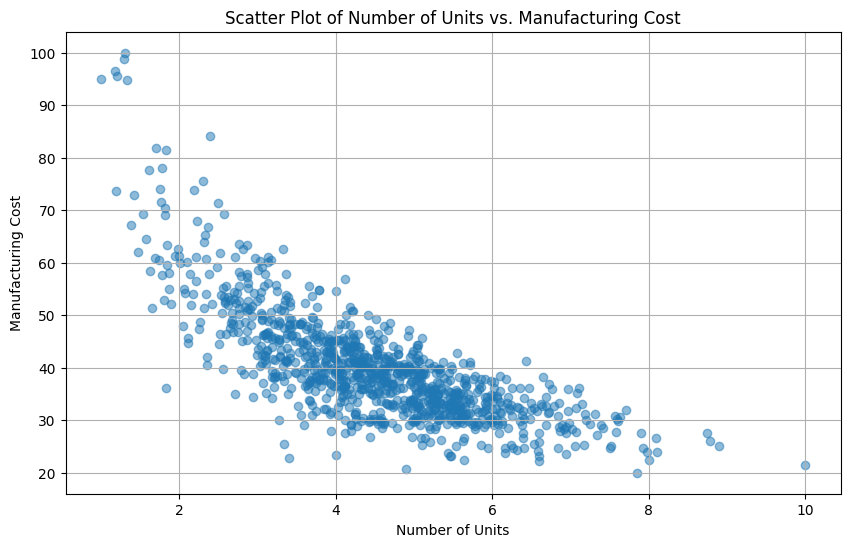

In [13]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(EconomiesOfScale['Number of Units'], EconomiesOfScale['Manufacturing Cost'], alpha=0.5)
plt.title('Scatter Plot of Number of Units vs. Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.grid(True)
plt.show()

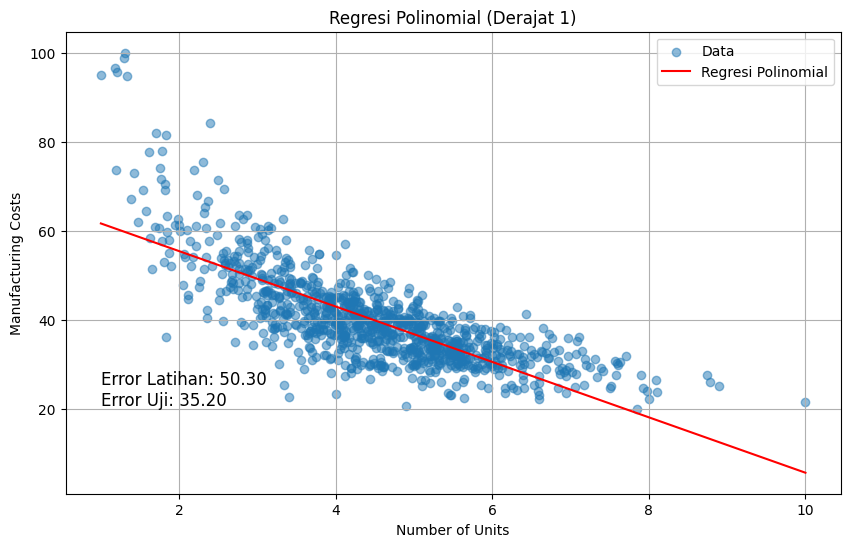

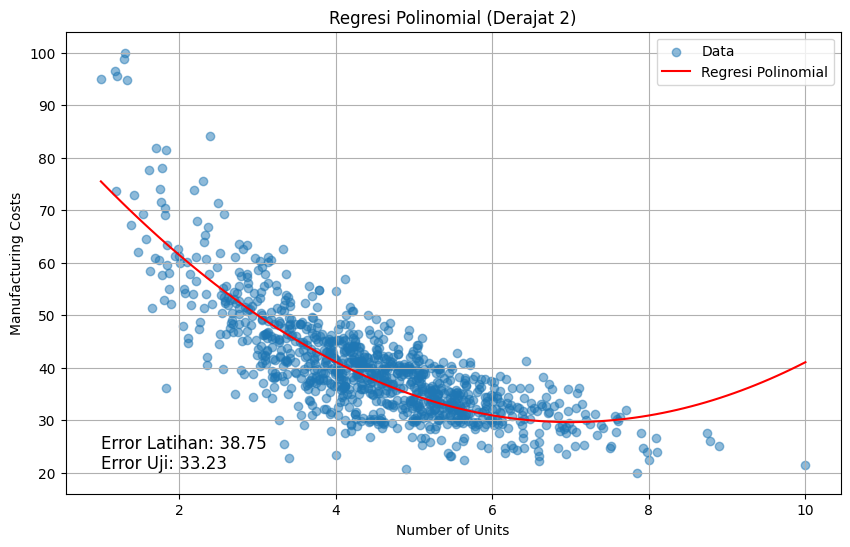

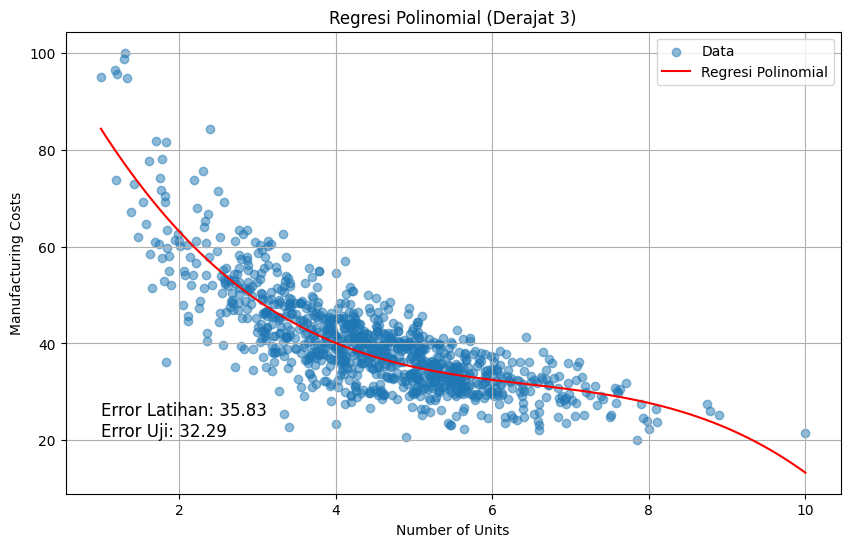

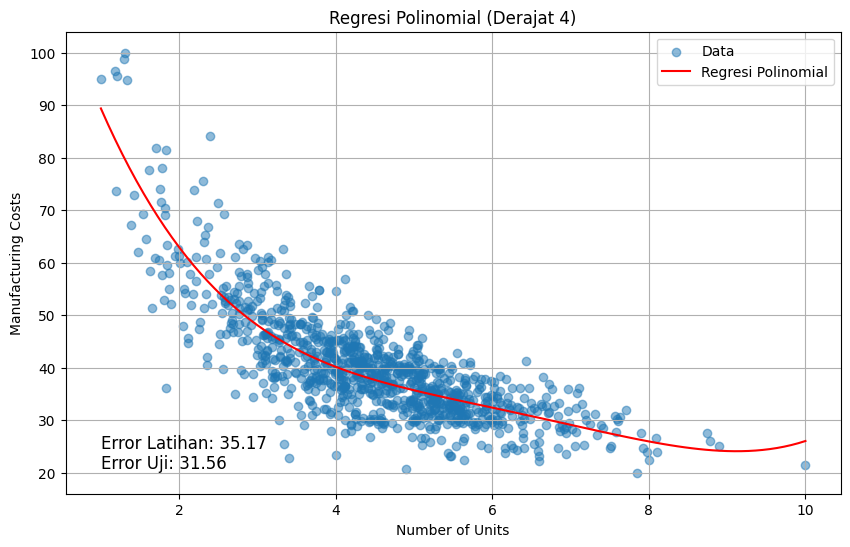

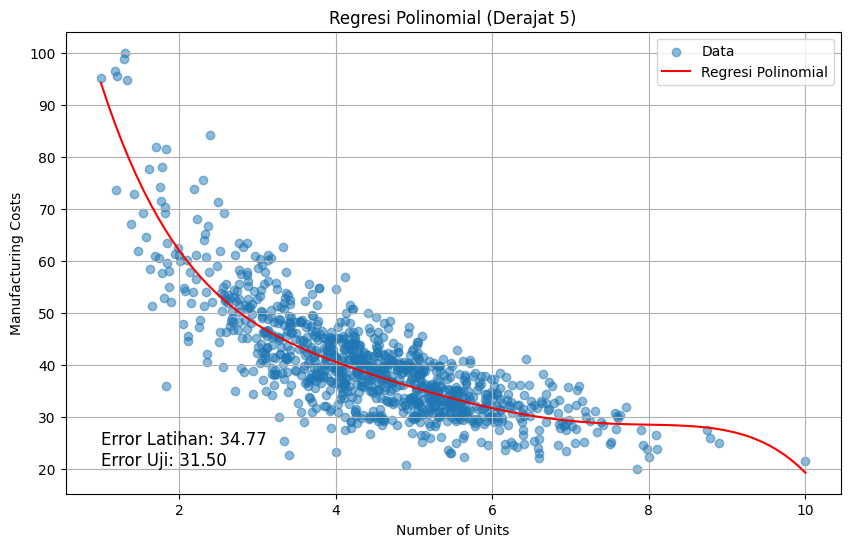

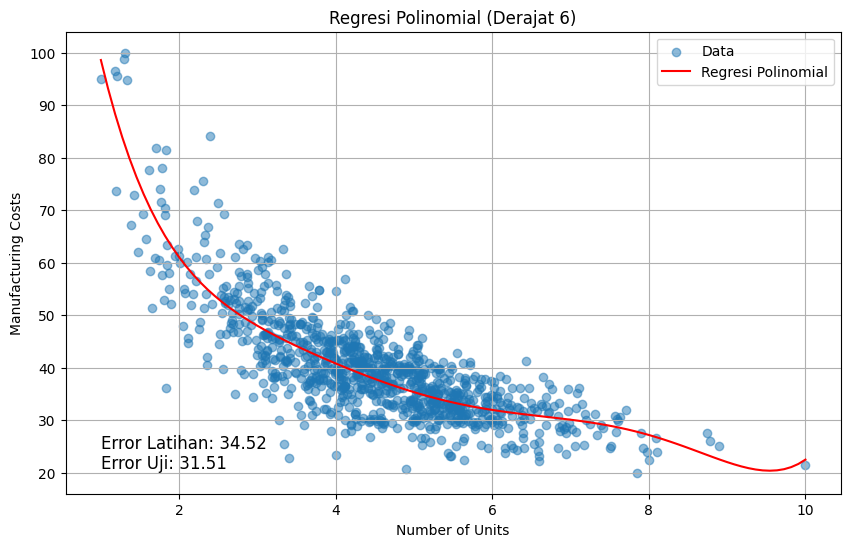

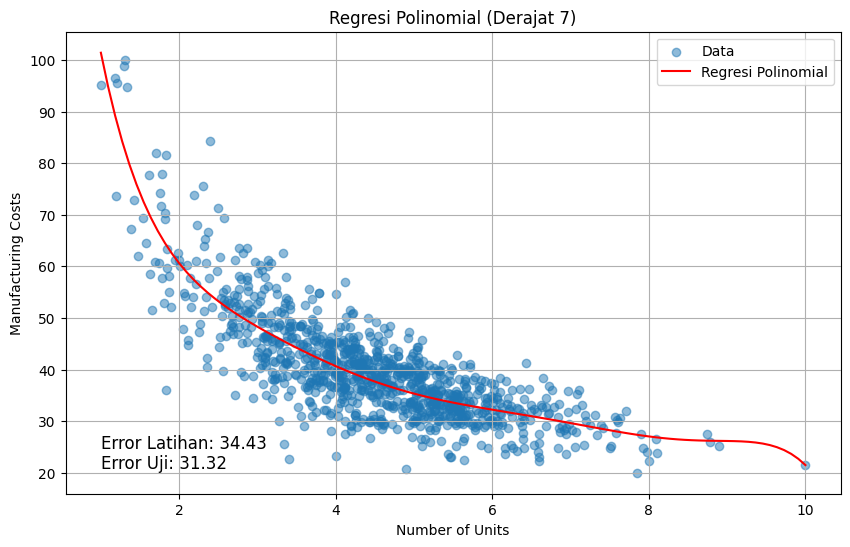

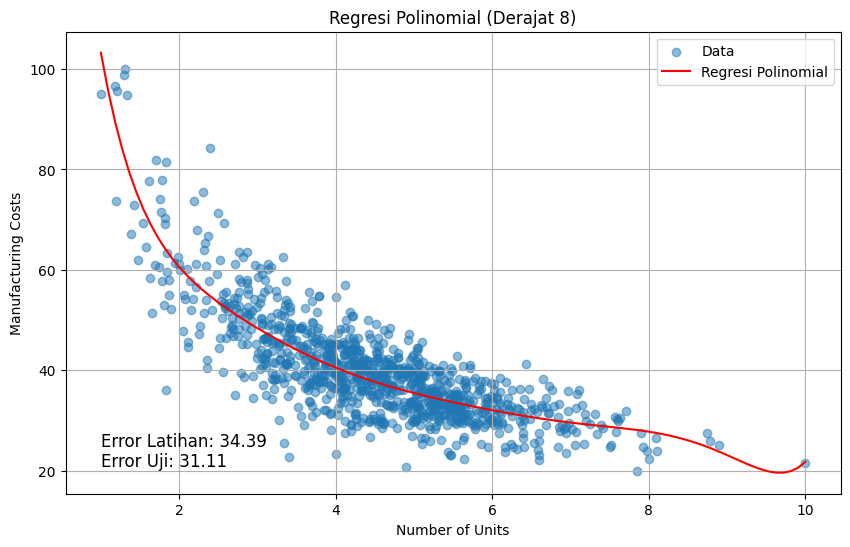

In [16]:
# Menggunakan derajat (degree) dari 1 hingga 8
degrees = np.arange(1, 9)

# Loop untuk berbagai derajat
for degree in degrees:
    # Membagi data menjadi data latihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat fitur polinomial
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Melatih model regresi linear
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Melakukan prediksi
    train_pred = model.predict(X_poly_train)
    test_pred = model.predict(X_poly_test)

    # Menghitung kesalahan latihan dan uji
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test, test_pred)

    # Membuat plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Data')
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_poly_range = poly.transform(X_range)
    y_pred_range = model.predict(X_poly_range)
    plt.plot(X_range, y_pred_range, color='red', label='Regresi Polinomial')
    plt.title(f'Regresi Polinomial (Derajat {degree})')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Costs')
    plt.legend()
    plt.grid(True)
    plt.text(X.min(), y.min(), f'Error Latihan: {train_error:.2f}\nError Uji: {test_error:.2f}', fontsize=12, va='bottom')
    plt.show()